<p> Run a simulation of filling in a network based on the 7 de Septiembre neighborhood layout in Araijan </p>
<p>**(.inp and .config files already written)**</p>
<p> Below you see how to:</p>
<ul>
<li>Set boundary and initial conditions </li>
<li>Run a simulation until time T= 1200 s</li>
<li>plot time series of pressure head at different points in a single pipe</li>
<li>plot time series of pressure head at sample points in various pipes</li>
<li>plot space dependence of pressure head at a certain time</li>
<li>look at velocities</li>
<li>plot network layout</li>
</ul>

In [1]:
#import modules for simulation and plotting
import sys  #for importing files you need
sys.path.append("..")  
from allthethings import PyNetwork, PyPipe_ps   #network and pipe classes
import numpy as np                              #for generally doing math
import matplotlib.pyplot as plt                 #for plotting
%pylab inline                                   
from writeit import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#specify input files
fi = "../indata/7deSeptiembre.inp"    
fc = "../indata/7deSeptiembre.config" 
mtype = 1                             #model type. set =0 for uniform cross-section channel flow (has not been tested for awhile)
#create a network 
n1 = PyNetwork(fi,fc,mtype)
#show the layout of the network
n1.showLayout()

   pipe | start node | end node
-----------------------------------
     0  |  0         | 1
     1  |  1         | 2
     2  |  2         | 3
     3  |  3         | 4
     4  |  4         | 5
     5  |  5         | 7
     6  |  7         | 8
     7  |  5         | 6
     8  |  4         | 9
     9  |  3         | 8
     10  |  8         | 10
     11  |  10         | 11
     12  |  11         | 12
     13  |  11         | 13


   node | #incoming pipes
-------------------------
  0     |  1
  1     |  2
  2     |  2
  3     |  3
  4     |  3
  5     |  3
  6     |  1
  7     |  2
  8     |  3
  9     |  1
  10     |  2
  11     |  3
  12     |  1
  13     |  1


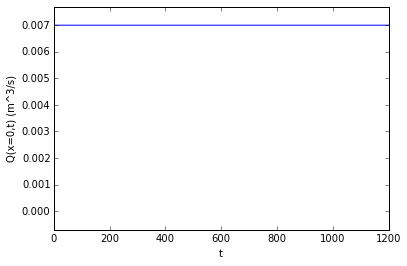

In [3]:
#create time series Q(x=0, t) = q0 for t<T/2, 0 for t>=T/2
q0 = 0.007 #inflow boundary value (m^3/s)
M = n1.M   #number of time steps
T = n1.T   #simulation length (in seconds)
Q0 = q0*np.ones(M+1);            
#for i in range(M/2,M+1):        
#    Q0[i] = 0

#look at this time series
t = linspace(0,n1.T,M+1)
plot(t,Q0)
ylim(-.1*Q0[0],1.1*Q0[0]) 
xlabel('t')
ylabel('Q(x=0,t) (m^3/s)')
#assign this inflow pattern as a boundary condition for junction 0 (at the left end of pipe 0)
n1.setbVal(0,Q0)
# set initial condition to (H = 10m, Q = Q0) in pipe 0, 'empty' everywhere else)
#make a single pipe "PyPipe" to evalute correct cross-sectional area corresponding to H = 10m
p1 = PyPipe_ps(n1.Ns[0], n1.Ds[0],n1.Ls[0], M, n1.a[0])  
h0 = p1.AofH(10,False)
A00 = h0*np.ones(n1.Ns[0])
Q00 = Q0[0]*np.ones(n1.Ns[0])
n1.setIC(0,A00,Q00)
Np = n1.Nedges # number of pipes
for k in range(1,Np):
    A00 = 0.001*n1.Ds[k]*np.ones(n1.Ns[k])  #set other pipes to 1e-3*(pipe diameter) to avoid near-zero roundoff issues
    Q00 = np.zeros(n1.Ns[k])
    n1.setIC(k, A00, Q00)

In [30]:
# take a look at initial conditions before starting simulation
n1.showCurrentData()

At time t = 0.000000
Data from pipe 0
A           Q
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.792325    0.007000
0.7

In [31]:
#Run the simulation!
dt = T/float(M)#time step
V0 = n1.getTotalVolume()
n1.runForwardProblem(dt)


In [32]:
m32gal = 264.172   #conversion factor, m^3 to gallons
m2psi = 1.42       #conversion factor, m of pressure head to psi
mdx = min([n1.Ls[i]/n1.Ns[i] for i in range(n1.Nedges)])
#print timing information
print "Simulated time T = %f s" %n1.T
print "Solve time = %f  s" %n1.solve_time
print "dt = %f" %dt
print "inflow volume = %.2f gallons" % ((n1.getTotalVolume()-V0)*m32gal)
print "pressure wave speed is %f m/s"% (max(n1.a))
print "CFL = 1/(dx/dt)*(max wave speed) = %f" % (max(n1.cmax)*dt/mdx)

Simulated time T = 1200.000000 s
Solve time = 99.135976  s
dt = 0.054545
inflow volume = 80974.63 gallons
pressure wave speed is 100.000000 m/s
CFL = 1/(dx/dt)*(max wave speed) = 0.559082


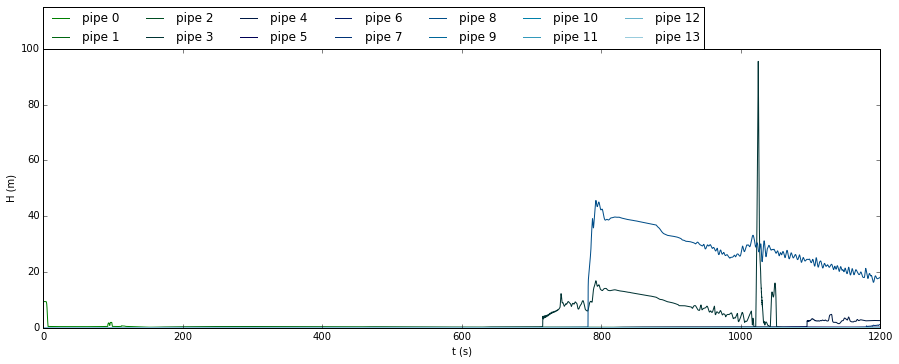

In [33]:
#show time series at a sensor in the middle of each pipe in the network
# import a nice colormap
from matplotlib import cm
import matplotlib.colors as colors
cNorm  = colors.Normalize(vmin=0, vmax=Np+1)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean') )
fig = figure(figsize= (15,5))
t = linspace(0,T,M+1)
interesting = arange(0,Np) #pipes you are interested in (currently all)
for i in interesting: 
    #look at pressure time series in i^th pipe, pbar(A(X*, t)), where X* = L/2 for pipe length L, and t =0, dt, 2*dt,...dt*M
    P1 = n1.pressureTimeSeries(i,n1.Ns[i]/2-1) 
    plot(t,P1,color =scalarMap.to_rgba(i), label = "pipe %d" %i) 
legend(ncol=7, loc = (0,1))
ax = gca()
ax.set_xlabel('t (s)')
ax.set_ylabel('H (m)')

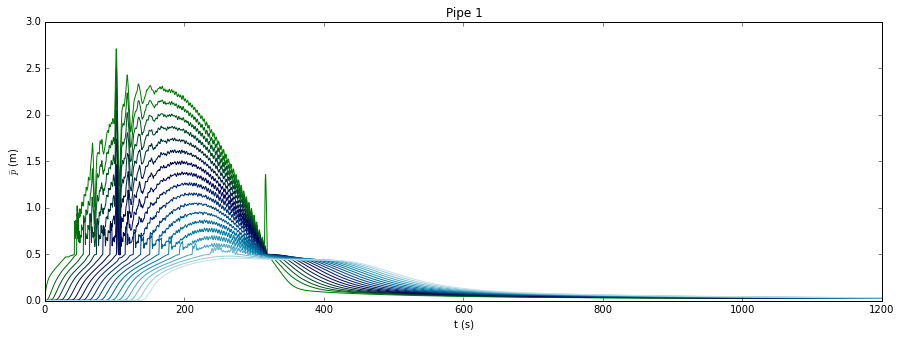

In [34]:
#show pressure time series at different locations along the length of a single pipe
i = 1  #pipe number you want to look at
fig = figure(figsize= (15,5))
#new color map
xs = np.arange(1,n1.Ns[i]+1,2)
cNorm  = colors.Normalize(vmin=0, vmax=xs[-1]+10)
scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cm.get_cmap('ocean') )
t = np.linspace(0,n1.T,M+1)
for J in range(0,len(xs),3):
    cval = scalarMap.to_rgba(xs[J])
    dx = n1.Ls[i]/float(n1.Ns[i])
    P2 = n1.pressureTimeSeries(i,J)
    q=plot(t,P2,color =cval,label="x = %.1f"%(dx*xs[J]))
ax = gca()
ax.set_title('Pipe %d'%i)
ax.set_xlabel('t (s)')
ax.set_ylabel(r'$\bar{p}$ (m)')
#legend(loc = 'upper left')
#savefig("../sensors_pipe%d.eps"%i, format='eps')

NameError: name 'dt' is not defined

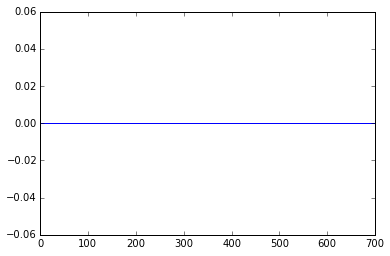

In [4]:
#show how pressure profile varies in space at the end of the run 
i = 7  # pipe you want to look at
m = M  #time slice you want to look at
Px = n1.pressureSpaceSeries(i,m)
x = linspace(0,n1.Ls[i],n1.Ns[i])
plot(x,Px)
title('Pipe %d at time %.2f s'%(i,dt*m))
xlabel('x')
ylabel(r'$\bar{p}(m)$')

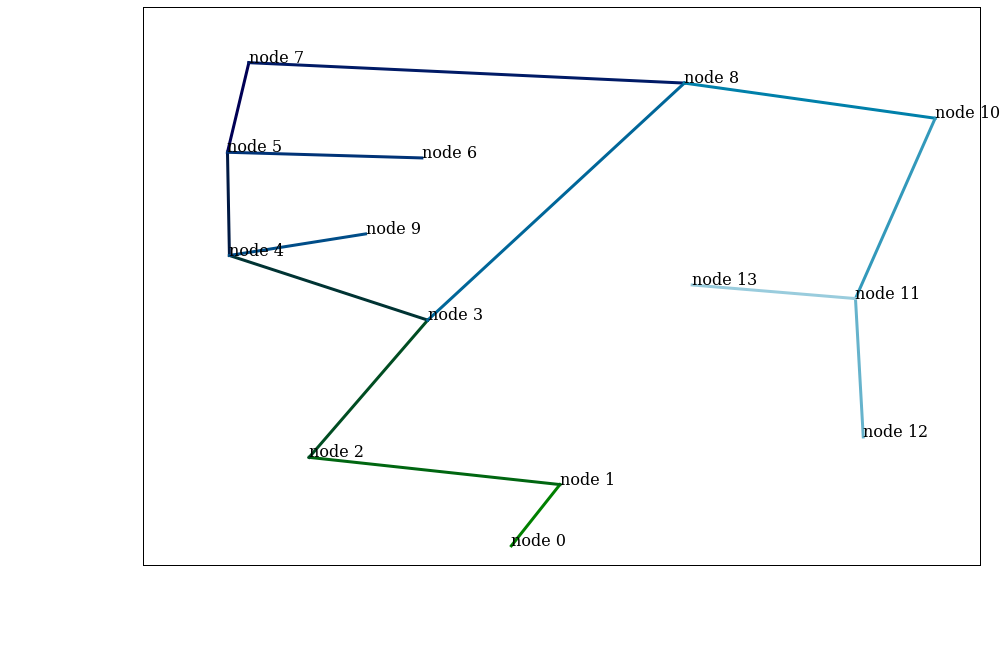

In [3]:
#plot network layout
(xs,ys,conns,ls) = getBasicConnectivity(fi)
Np = shape(conns)[0]
plotNetworkLayout(xs,ys,conns,ls,Np)

In [41]:
print unique(conns)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
